# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии. 

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр. 

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии. 
 
 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

# Import библиотек

In [ ]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

Saving cars_moldova_cat_num.csv to cars_moldova_cat_num.csv


# Считываем файл в DataFrame



метод .read_csv(path,delimiter) 

In [ ]:
df = pd.read_csv('/content/cars_moldova_cat_num.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,12500.000000
4,23,124,2000,5,300000.0,2200.0,0,0,3490.0,13636.363636
...,...,...,...,...,...,...,...,...,...,...
32069,42,88,2016,10,88000.0,1800.0,4,1,11500.0,14666.666667
32070,19,53,2002,3,225000.0,1800.0,3,0,4400.0,11250.000000
32071,6,77,2015,11,89000.0,1500.0,0,0,7000.0,12714.285714
32072,22,10,2006,1,370000.0,2000.0,0,0,4000.0,23125.000000


In [ ]:
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,12500.000000
4,23,124,2000,5,300000.0,2200.0,0,0,3490.0,13636.363636
...,...,...,...,...,...,...,...,...,...,...
32069,42,88,2016,10,88000.0,1800.0,4,1,11500.0,14666.666667
32070,19,53,2002,3,225000.0,1800.0,3,0,4400.0,11250.000000
32071,6,77,2015,11,89000.0,1500.0,0,0,7000.0,12714.285714
32072,22,10,2006,1,370000.0,2000.0,0,0,4000.0,23125.000000


In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year'] 

## Метод главных компонент


Метод главных компонент - это метод снижения размерности данных путем преобразования их в такую форму, чтобы оставить только максимально полезную информацию. 

Метод работает без учителя, поэтому под термином полезная информация в данном методе понимается набор независимых друг от друга признаков с максимальной дисперсией (с максимальным разбросом значений). При этом мы изначально полагаем, что интенсивность (в некотором смысле) полезной информации преобладает над интенсивностью каких-то случайных искажений или других не идеальностей нашего набора данных. 

Для выделения полезной информации в методе главных компонент проводится преобразование данных от набора исходных столбцов (исходных признаков), которые могут содержать шумы и быть линейно зависимыми к набору новых столбцов, которые обладают важным свойством линейной независимости (не коррелируют). Такие новые столбцы можно изобразить как некоторую систему координат, в которых можно отложить точки - наши данные. При этом часто оказывает так, что некоторые из координат не нужны - в них почти наверняка нет информации. 

Это можно представить, как если мы возьмём двухмерную фигуры и будем строить ее в трехмерной плоскости. При этом окажется, что можно выбрать такую систему координат, что третья ось не нужна. При этом даже если мы возьмём трехмерную цельную фигуры, но по одной из осей у нас будет "совсем чуть-чуть", то можно рассмотреть этот случай как двухмерный. 

В нашем примере две оси, в которых будет основная часть фигуры будут главными компонентами. Совокупность наших главных компонент образует т.н. собственное подпространство. Третья ось останется т.н. шумовым подпространством. Как видно из примера размерность фигуры в каждой из обозначенных осей будет соответствовать важности этой оси. 

Другими словами, можно сказать что разброс значений в каждой оси будет соответствовать ее важности. Такой разброс значений по каждой оси будет называться - собственные значения. Сортируя собственные значения по убыванию, мы можем определить те из них, которые следует оставить и те, которые следует убрать. 

Цель Метода Главных компонент найти и отбросить шумовое подпространство.

Классический метод главных компонент состоит из следующих операций:
1.	вычисление ковариационной матрицы для набора данных - то есть матрицу дисперсий.
2.	вычисление (поиск) собственных векторов и их собственных значений по ковариационной матрице.
3.	сортировка собственных значений по убыванию.
4.	выделения собственного подпространства.
5.	преобразование данных - построение проекции исходного массива на полученные собственные вектора.

1-4 операции будут реализованы функцией `fit` последняя операция будет реализована функцией `transform`. Также нами будет реализована операция `inverse_transform`, необходимая для восстоновления исходного набора данных. Важно отметить, что на практике такое восстановление может быть не точным так как сокращая разность данных вы можете удалить оттуда и часть полезной информации. Оценку точности восстоновления можно провести по метрике $R_2$, которая обсуждалась выше.

Отметим, что известно, что собственные вектора и собственные значения для некоторой квадратной матрицы $A$ удовлетворяют следующему уравнению:
$$A\vec{V}_i = \lambda_i\vec{V}_i,$$
где $\vec{V}_i$ - это собственный вектор; $\lambda_i$ - соответствующее собственное значение. По сути выражение выше представляет собой решение системы линейных уравнений с параметром $\lambda_i$. Значения данного параметра можно найти из следующего выражения:
$$ det(A-\lambda_I) = 0, $$
где $det$ - операция поиска определителя матрицы, а $\lambda_I$ - диагональная матрица с собственными значениями по главной диагонали и нулями в остальных позициях. При раскрытие операции детерменент по определению данное уравнение может быть сведено к поиску корней полнинома.





In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None
    
    #--------------------------------    
    def fit(self, X):

        self.mean = np.mean(X, axis=0)
        
        # расчет матрицы ковариации
        cov_matrix = np.cov(X - self.mean, rowvar = False)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        idx = eigenvalues.argsort()[::-1] #индексы сортировки по значениям собственных векторов
        
        # сортируем собственные вектора и значения
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx]
        
        return self
    
    #--------------------------------
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    #--------------------------------
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        return np.dot(X_new, self.components.T) + self.mean
    #--------------------------------
    def score(self, X):
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(12,4)):
        plt.figure(figsize=figsize)
        plt.plot(self.values,'-o', label='all eigvalues')
        plt.plot(self.values[:self.n_components],'-o', label='eigen subspace')
        plt.title('eigenvalues');plt.legend();plt.show()
    


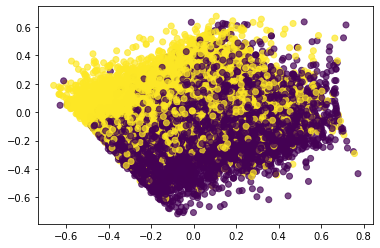

eigenvalues [0.0432144  0.03199174 0.01798884 0.00375675 0.00275689]


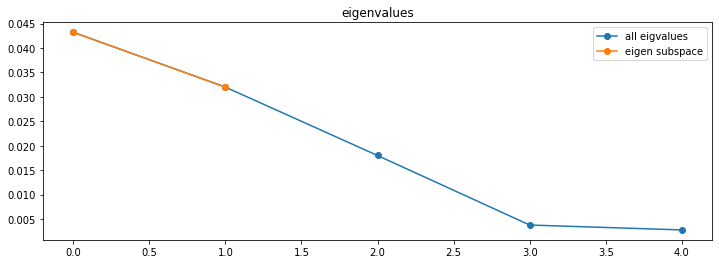

score: 0.9244683467013006


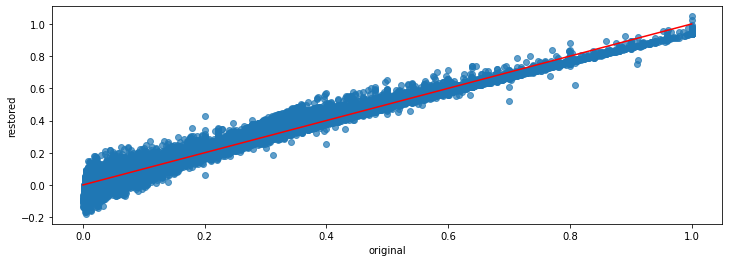

In [ ]:
df_num = df[num_columns].copy()
scaler = MinMaxScaler()
X = scaler.fit_transform(df_num)

labels = df.Transmission.values

pca = PCA(n_components = 2)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:,0], X_new[:,1], c =labels, alpha = 0.7); 
plt.show()

print('eigenvalues',pca.values)
pca.plot_eigvalues()

print('score:',pca.score(X))

X2 = pca.inverse_transform(X_new)
plt.figure(figsize=(12,4))
plt.scatter(X[:,1],X2[:,1],alpha = 0.7 )
plt.plot([X[:,1].min(),X[:,1].max()],[X[:,1].min(),X[:,1].max()], 'r')
plt.xlabel('original')
plt.ylabel('restored');


Визуализация "весов" главных компонент

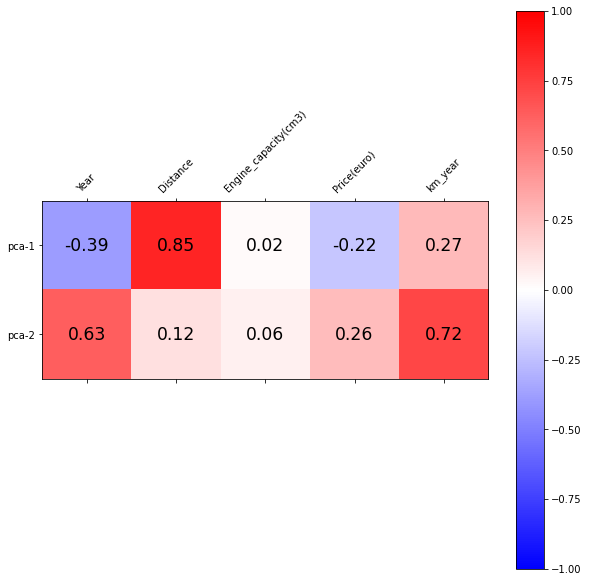

In [ ]:
fig=plt.figure(figsize=(10,10))
W = pca.components.T
pca_names = ['pca-'+str(x+1) for x in range(2)]
plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'xx-large')
plt.xticks(np.arange(0, W.shape[1]), df[num_columns].columns,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),pca_names)
plt.colorbar();

Проверим как работает PCA на категориальных данных

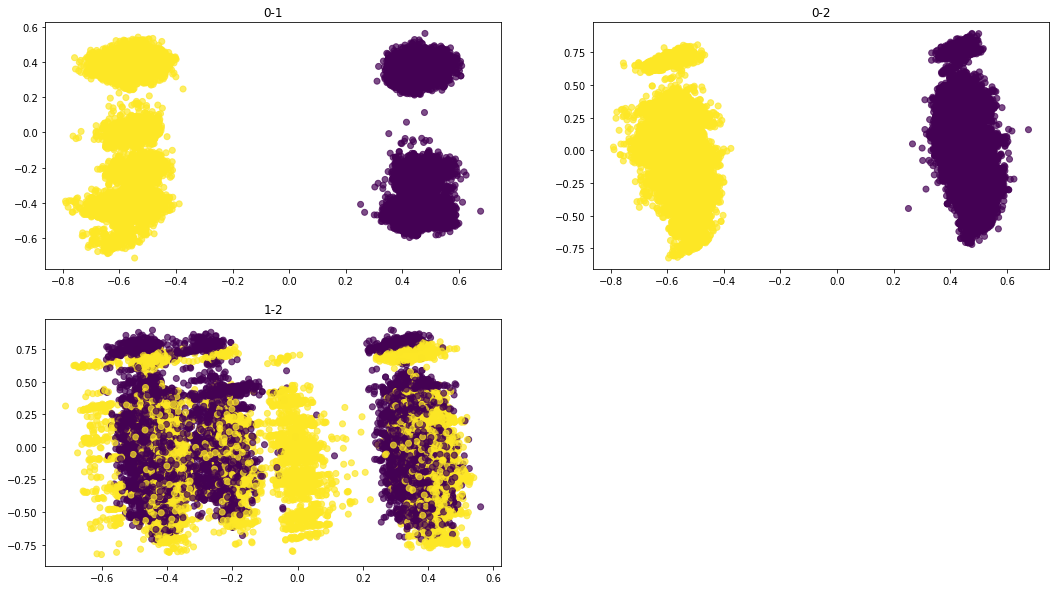

score: 0.7913503446575314


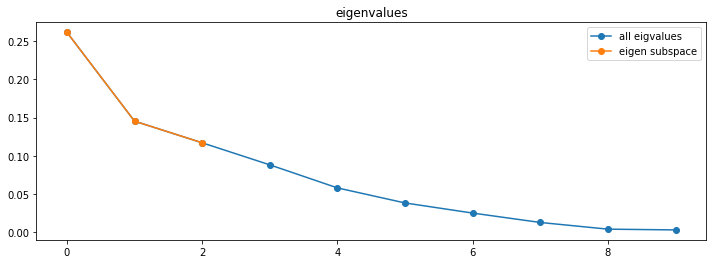

In [ ]:
scaler    = MinMaxScaler()
X_cluster = scaler.fit_transform(df)
pca = PCA(n_components=3)

X_new = pca.fit_transform(X_cluster)
X_new.shape

plt.figure(figsize=(18,10))
plt.subplot(221); plt.scatter(X_new[:,0],X_new[:,1], c =labels, alpha = 0.7); plt.title("0-1")
plt.subplot(222); plt.scatter(X_new[:,0],X_new[:,2], c =labels, alpha = 0.7); plt.title("0-2")
plt.subplot(223); plt.scatter(X_new[:,1],X_new[:,2], c =labels, alpha = 0.7); plt.title("1-2")
plt.show();

print('score:',pca.score(X_cluster))
pca.plot_eigvalues()



In [ ]:
print('eigenvalues',np.cumsum(pca.values))

eigenvalues [0.26189664 0.4072552  0.52420759 0.61226543 0.67008502 0.70816201
 0.732978   0.74547231 0.7492039  0.75194438]


Визуализация "весов" главных компонент

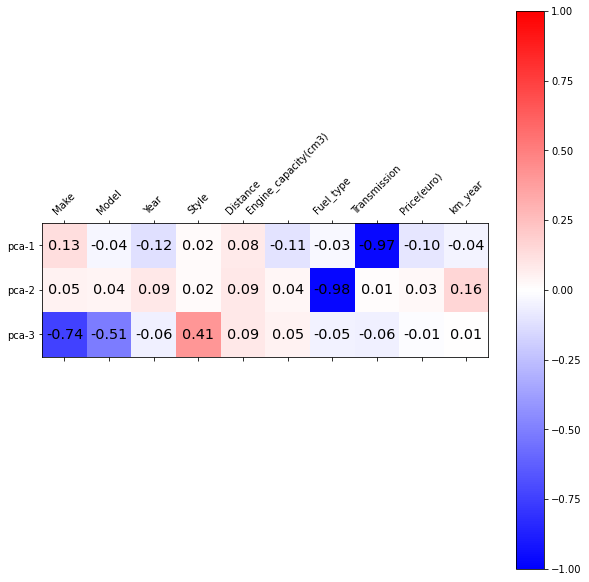

In [ ]:
fig=plt.figure(figsize=(10,10))
W = pca.components.T
pca_names = ['pca-'+str(x+1) for x in range(3)]
plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'x-large')
plt.xticks(np.arange(0, W.shape[1]), df.columns,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),pca_names)
plt.colorbar();

## Кластеризация k-средних

В ряде случаев при анализе данных оказывается так, что про данные ничего не известно, однако хочется понять на сколько они однородны или, например, могут быть разделены на группы. Такие группы можно назвать кластерами. Задача разделения на кластеры не требует наличия учителя. Другими словами, мы пытаемся найти закономерности в данных как таковых без привязки к тому, какие результаты для них мы хотим получить.<br>

 Одним из самых простых методов кластеризации является метод k-средних.
Суть данного метода сводится к тому, чтобы найти заданное число кластеров (k) и их центры (т.н. центроиды) таких, чтобы расстояние от центроидов до всех точек кластера было минимальным.

Алгоритм k-средних может быть описан следующим образом <ul>
<li>выбирается к случайным точкам - центроиды.
<li>рассчитывается вектор расстояние между каждой точкой набора данных и каждым центроидом.
<li>в каждый кластер записываются те точки для которых оказалось, что для соответствующего центроида расстояние меньше, чем для других.
<li>новые значение центроидов рассчитываются как среднее значение по всем точкам кластера.


In [ ]:
df_num = df[num_columns].copy()
scaler = MinMaxScaler()
X = scaler.fit_transform(df_num)
X.shape

(32074, 5)

Рассчитаем расстояние как корень из суммы разностей квадратов.

In [ ]:
def distance(X1, X2):
    return np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))

Проведем несколько тестов, функция работает как с векторами, так и матрицами равной размерности.

In [ ]:
print(distance(X[0], X[1]))
print(distance(X[:5], X[10:15]))
print(distance(X[0], X[10:15]))

0.14922460154126457
[0.37583771 0.6149593  0.29364398 0.15344456 0.37425772]
[0.37583771 0.49053137 0.15160638 0.18870645 0.15370143]


Прежде чем проводить кластеризацию необходимо проинициализировать кластеры.<br>
Для этого выберем случайные индексы среди доступных в наборе данных.

In [ ]:
def init_centroids(X, n_clusters):
    centroid_idxs = np.random.randint(0, X.shape[0], size = n_clusters)
    return X[centroid_idxs,:]


посмотрим как это работает для двух кластеров

In [ ]:
n_clusters = 2
centroids = init_centroids(X, n_clusters)
print(centroids)

[[0.74       0.19983997 0.22916667 0.01803607 0.14113942]
 [0.88       0.18663733 0.47791667 0.14829659 0.26538792]]


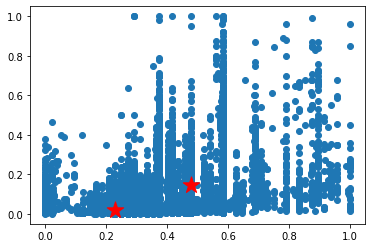

In [ ]:
plt.scatter(X[:, 2], X[:, 3])
plt.scatter(centroids[:, 2], centroids[:, 3], marker='*', s=300, c='red')
plt.show()

Проведем первую кластеризацию. Для этого возьмем каждый центроид и посчитаем расстояние от него до все записей набора данных. <br>
Индексы значений для каждого кластера выберем как индексы минимальных расстояний до соответствующего центроида. <br>
Таким образом, нулевой кластер будет включать те точки набора данных, в которых расстояние до нулевого центроида меньше, чем до первого центроида.

In [ ]:
def predict(X, n_clusters, centroids):
    distances = np.zeros((X.shape[0], n_clusters))

    for i,centr in enumerate(centroids):
        distances[:,i] = distance(centr,X)

    cluster_label = np.argmin(distances,axis = 1)
    return cluster_label

посмотрим как распределились результаты кластеризации

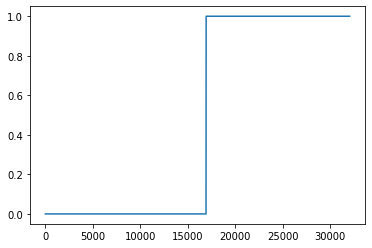

In [ ]:
cluster_label=predict(X, n_clusters, centroids)
plt.plot(np.sort(np.copy(cluster_label)));

Проверим результаты первой кластеризации

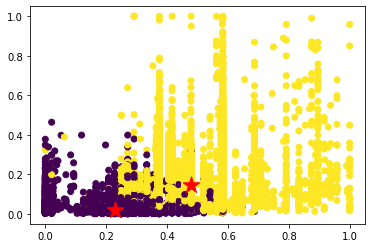

In [ ]:
plt.scatter(X[:, 2], X[:, 3], c = cluster_label, )
plt.scatter(centroids[:, 2], centroids[:, 3], marker='*', s=300, c='red')
plt.show()

Теперь выберем новые центроиды, для этого нам понадобиться выбрать каждый кластер по отдельности.
<br> Новый центроид для каждого кластера выберем как среднее значение по кластеру.<br>
Раcсмотрим для начала пример с 0 кластером.<br>
В визуализации вы увидите старый центроид как звезду и новый как красный круг.

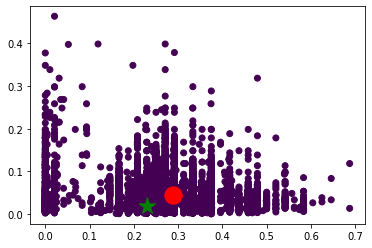

In [ ]:
c_idxs = np.flatnonzero(cluster_label==0)
cluster_zero = X[c_idxs]
new_centroid = cluster_zero.mean(axis = 0)
plt.scatter(cluster_zero[:, 2], cluster_zero[:, 3], c = cluster_label[c_idxs])
plt.scatter(new_centroid[2], new_centroid[3], marker='o', s=300, c='red')
plt.scatter(centroids[0, 2], centroids[0, 3], marker='*', s=300, c='green');

Проведем такую операцию для всех кластеров.

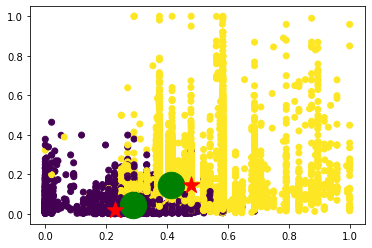

In [ ]:
old_centroids = np.copy(centroids)

for k in range(n_clusters):
    c_idxs = np.flatnonzero(cluster_label==k)
    centroids[k] = X[c_idxs].mean(axis = 0)
    
plt.scatter(X[:, 2], X[:, 3], c = cluster_label)
plt.scatter(centroids[:,2], centroids[:,3], marker='o', s=700, c='green')
plt.scatter(old_centroids[:, 2], old_centroids[:, 3], marker='*', s=300, c='red');


Рассчитаем относительное расстояние между старыми и новыми центроидами. Если расстояние между обновленными центроидами будет сравнительно небольшим - то есть центроиды перестанут менять позицию, то мы будем считать что кластеризация закончена.

In [ ]:
def delta_centroids(centroids,old_centroids):
    return (distance(centroids,old_centroids)/distance(old_centroids, np.mean(old_centroids))).mean()

delta_centroids(centroids,old_centroids)

0.3563319608127712

Попробуем создать процедуры итерационной кластеризации. В кноце процедуры выведем результирующий номер итерации и расстояние между кластерами

In [ ]:
def fit(X, n_clusters, centroids, max_iter=10, tol=0.01):
    
    dcentr = np.inf
    
    for i in range(max_iter):
        
        old_centroids = np.copy(centroids)
        cluster_label=predict(X, n_clusters, centroids)
        
        for k in range(n_clusters):
            c_idxs = np.flatnonzero(cluster_label==k)
            centroids[k] = X[c_idxs].mean(axis = 0)
        
        dcentr = delta_centroids(centroids,old_centroids)
        
        if dcentr<=tol:
            break
    
    print('Мы остановились на итерации:', i,'изменение центра кластеров: ',dcentr)
            
    return cluster_label

проверим и визуализируем результаты:

In [ ]:
old_centroids = np.copy(centroids)

cluster_label = fit(X, n_clusters, centroids, max_iter=100, tol=0.001)

Мы остановились на итерации: 20 изменение центра кластеров:  0.0008294233602501066


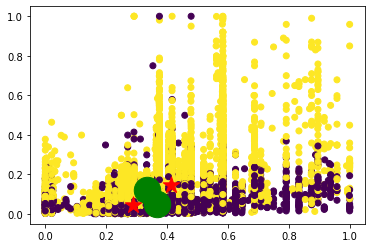

In [ ]:
plt.scatter(X[:, 2], X[:, 3], c = cluster_label)
plt.scatter(centroids[:,2], centroids[:,3], marker='o', s=700, c='green')
plt.scatter(old_centroids[:, 2], old_centroids[:, 3], marker='*', s=300, c='red');

Теперь объеденим все наши наработки в один класс.

In [ ]:
class KMeans():
    def __init__(self,n_clusters = 2, centroids = None, max_iter=10, tol=0.01):
        self.n_clusters = n_clusters
        self.centroids  = centroids
        self.max_iter   = max_iter        
        self.tol        = tol
        self.iters      = None
    #-------------------------------------    
    def distance(self, X1, X2):
        return np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
    #-------------------------------------
    def init_centroids(self, X):
        c_idxs = np.random.randint(0, X.shape[0], size = self.n_clusters)
        return X[c_idxs,:]
    #-------------------------------------
    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i,centr in enumerate(self.centroids):
            distances[:,i] = self.distance(centr,X)

        return np.argmin(distances,axis = 1) # метка кластера
    #-------------------------------------
    def delta_centroids(self,old_centroids):
        return (
                distance(self.centroids,old_centroids)/
                distance(old_centroids, np.mean(old_centroids))
               ).mean()
    #-------------------------------------
    def fit(self, X):
        
        if self.centroids is None:
            self.centroids = self.init_centroids(X)
    
        d_centrs = np.inf

        for i in range(self.max_iter):

            old_centroids = np.copy(self.centroids)
            
            cluster_label = self.predict(X)

            for k in range(self.n_clusters):
                
                c_idxs = np.flatnonzero(cluster_label==k)
                
                self.centroids[k] = X[c_idxs].mean(axis = 0)

            d_centrs = self.delta_centroids(old_centroids)

            self.iters = i
            if d_centrs<=self.tol:
                break
        return self        
    #-------------------------------------
    def fit_transform(self, X):
        return self.fit(X).predict(X)
    
    

Проверим как это работает. Отметим, что в данном примере мы проведем кластеризацию на двух-мерной выборке данных. Это будет правильней с точки зрения визуализации.

Мы остановились на итерации: 13


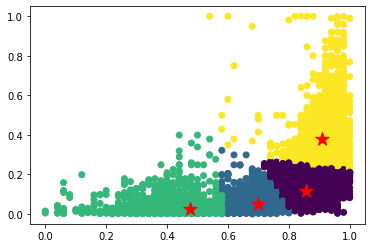

In [ ]:
kmeans   = KMeans(n_clusters=4, max_iter=1000, tol=0.0001)
c_labels = kmeans.fit_transform(X[:,[0,3]])

print('Мы остановились на итерации:',kmeans.iters)

plt.scatter(X[:, 0], X[:, 3], c = c_labels)

plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1],marker='*', s=200, c='red')

Также проверим результаты для результата сжатия размерности методом главных компонент набора данных с категориальными переменными

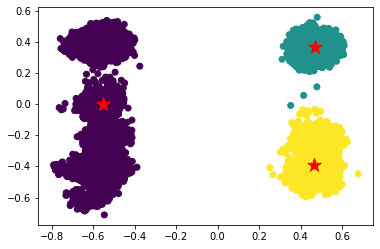

Мы остановились на итерации: 2


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

pca = PCA(n_components = 2)
pca.fit(X)
X_new = pca.transform(X)


kmeans   = KMeans(n_clusters=3, max_iter=1000, tol=0.00001)
c_labels = kmeans.fit_transform(X_new)

plt.scatter(X_new[:,0],X_new[:,1], c = c_labels);
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1],marker='*', s=200, c='red')
plt.show();
print('Мы остановились на итерации:',kmeans.iters)

# Контрольные вопросы